In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./speech_data.csv")
df.head(3)

,Name,Unifying Words Count,Polarizing Words Count,Total Words Count,Political Party,Overall Language,Unifying Words Ratio,Polarizing Words Ratio,Overall Ratio
0,Donald J. Trump (2nd Term),20,23,2905,Republican,polarizing,0.00688,0.00792,0.8687
1,"Joseph R. Biden, Jr.",31,6,2532,Democrat,unifying,0.01224,0.00237,5.1646
2,Donald J. Trump (1st Term),12,4,1455,Republican,unifying,0.00825,0.00275,3.0000


In [31]:
# View unique parties
df["Political Party"].value_counts()

Political Party
Republican                   26
Democrat                     24
Democratic-Republican         7
Whig                          2
No formal party               2
Whig (later Unaffiliated)     1
Federalist                    1
Name: count, dtype: int64

# Subset Data 
We will subset only observations with Republican and Democratic presidents for the sake of our analysis. This still leaves us with 50 observations.

In [32]:
# Subset data with Republican or Democratic Presidents
df2 = df[
    (df["Political Party"] == "Republican") | (df["Political Party"] == "Democrat")
].copy()

df2.head()
df2["Political Party"].unique()

array(['Republican', 'Democrat'], dtype=object)

# Exploratory Plots

Text(0.5, 1.0, 'Distributions of Overall Ratios of Unifying to Polarizing Language Used')

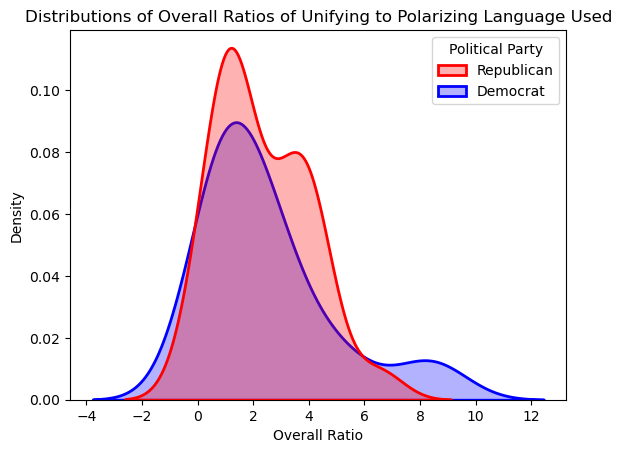

In [50]:
sns.kdeplot(
    data=df2,
    x="Overall Ratio",
    hue="Political Party",
    palette={"Republican": "red", "Democrat": "blue"},
    fill=True,
    alpha=0.3,
    linewidth=2,
)
plt.title("Distributions of Overall Ratios of Unifying to Polarizing Language Used")

Text(0.5, 1.0, 'Average and Individual Overall Ratios by Political Party')

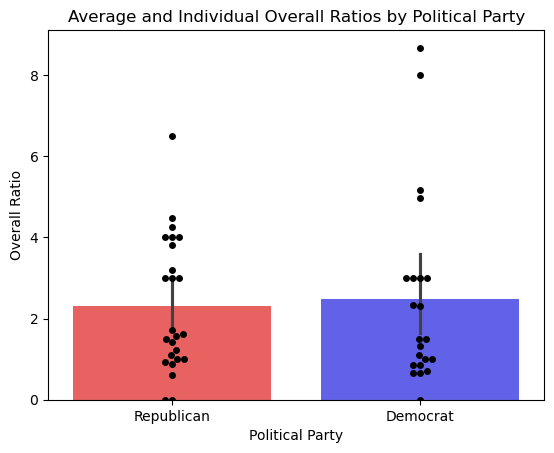

In [52]:
sns.barplot(
    data=df2,
    x="Political Party",
    y="Overall Ratio",
    alpha=0.7,
    hue="Political Party",
    palette={"Republican": "red", "Democrat": "blue"},
)
sns.swarmplot(data=df2, x="Political Party", y="Overall Ratio", color="black")
plt.title("Overall Ratios by Political Party")

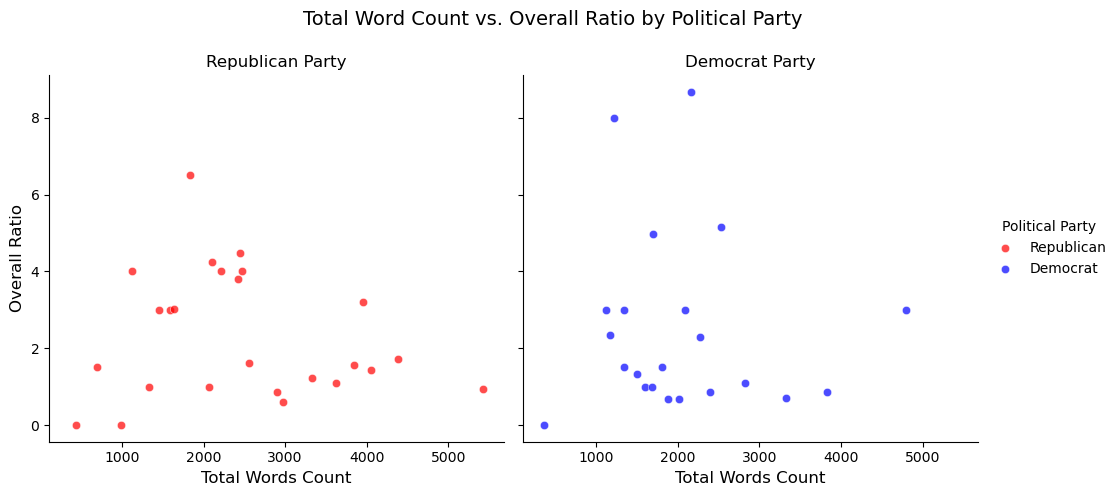

In [67]:
g = sns.FacetGrid(
    df2,
    col="Political Party",
    hue="Political Party",
    palette={"Republican": "red", "Democrat": "blue"},
    height=5,
)
g.map(sns.scatterplot, "Total Words Count", "Overall Ratio", alpha=0.7)
g.set_axis_labels("Total Words Count", "Overall Ratio", size=12)
g.set_titles("{col_name} Party", size=12)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Total Word Count vs. Overall Ratio by Political Party", fontsize=14)
plt.show()